# Test on 3 real PIV cases
- Author: Yong Lee (yongli.cv@gmail.com)
- Date: Aug 1st, 2021

The cases are:
1. Laminar flow, [https://www.pivchallenge.org/pub05/index.html#b](https://www.pivchallenge.org/pub05/index.html#b), Case B, images 10 and 11;
2. Turbulent flow, [http://fluid.irisa.fr/data-eng.htm](http://fluid.irisa.fr/data-eng.htm), Case 1, images 1 and 2;
3. Votex Pair, [http://www.pivtec.com/pivview.html](http://www.pivtec.com/pivview.html)

In [1]:
from deformpiv import *
import os

kernel_methods = ['openpiv', 'opticalflow', 'deeppiv']
warping_methods = ['CDI', 'FDDI']

test_set = [['./TestImages/Case1/B_010.TIF', './TestImages/Case1/B_011.TIF'],
            ['./TestImages/Case2/run010050000.tif','./TestImages/Case2/run010050010.tif'],
            ['./TestImages/Case3/vp1a.tif','./TestImages/Case3/vp1b.tif']
           ]

vmaxs = [6, 2, 6] # for visualization

results = []
for k, case in enumerate(test_set):
    print(f"\nComputing for case: {k}")
    img1 = cv2.imread(case[0], 0)
    img2 = cv2.imread(case[1], 0)
    
    result = []
    for kernel in kernel_methods:
        result.append([])
        for warp in warping_methods:
            config = AttrDict()
            config.pivmethod = kernel
            config.deform = warp
            config.runs = 10

            piv = DeformPIV(config)
            x, y, u, v = piv.compute(img1, img2)
            result[-1].append([x, y, u, v])
            
    results.append(result)

#     # plot the results
#     for i, kernel in enumerate(kernel_methods):
#         for j, warp in enumerate(warping_methods):
#             x, y, u, v = result[i][j]
#             x_delta, y_delta = x[0,1]-x[0,0], y[1,0]-x[0,0]
#             info =f"{kernel:13s}_{warp:5s}"
#             print(info)

#             step0, step1 = int(u.shape[0]/32+1), int(u.shape[1]/32+1)
#             fig = plt.figure(figsize=(16,8))
#             plt.imshow(np.sqrt(u**2+v**2), vmax=vmaxs[k])
#             cb = plt.colorbar()
#             cb.ax.tick_params(labelsize=48)  #设置色标刻度字体大小。
#             plt.quiver((x[::step0, ::step1]-x[0,0])/x_delta, (y[::step0, ::step1]-y[0,0])/y_delta, u[::step0, ::step1], -v[::step0, ::step1])
#             plt.axis('off')
#             plt.savefig(f"./output/{k}"+info+'.pdf')
#             plt.title(info)

#             _, _, u_cdi, v_cdi = result[i][0]
#             fig = plt.figure(figsize=(16,8))
#             err = np.sqrt((u-u_cdi)**2+(v-v_cdi)**2)
#             plt.imshow(err, vmax=0.1)
#             err[err>0.1]=0.1
#             print(kernel, warp,np.mean(err))
#             cb = plt.colorbar()
#             cb.ax.tick_params(labelsize=48)  #设置色标刻度字体大小。
#             plt.quiver((x[::step0, ::step1]-x[0,0])/x_delta, (y[::step0, ::step1]-y[0,0])/y_delta,
#                        u[::step0, ::step1]-u_cdi[::step0, ::step1],
#                        -v[::step0, ::step1]+v_cdi[::step0, ::step1])

#             plt.axis('off')
#             plt.savefig(f"./output/{k}"+info+'_error.pdf')
#             plt.title(info)

# plt.show()

Cuda installed! Running on GPU!
unliteflownet load successfully.

Computing for case: 0

Computing for case: 1


/home/yong/miniconda3/envs/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yong/miniconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



Computing for case: 2


case0_openpiv      _FDDI 0.012
case0_opticalflow  _FDDI 0.047
case0_deeppiv      _FDDI 0.053
case1_openpiv      _FDDI 0.026
case1_opticalflow  _FDDI 0.049
case1_deeppiv      _FDDI 0.049


/home/yong/miniconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


case2_openpiv      _FDDI 0.033
case2_opticalflow  _FDDI 0.057
case2_deeppiv      _FDDI 0.068


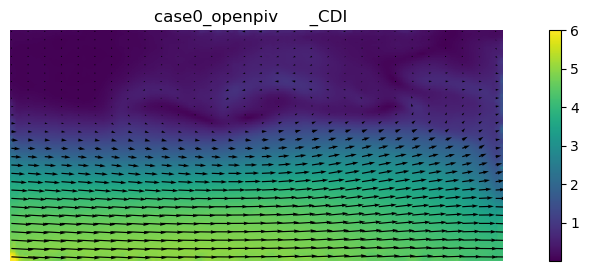

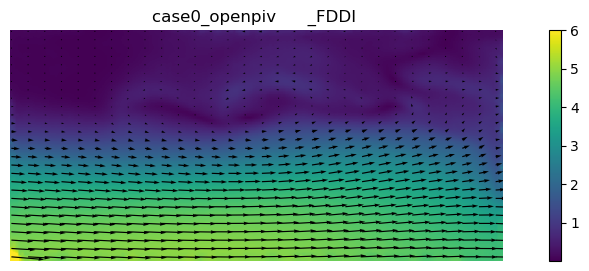

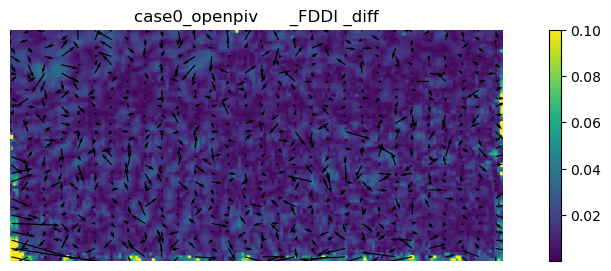

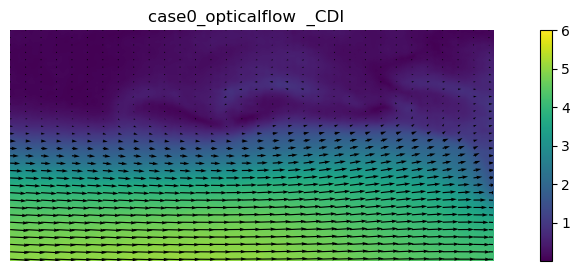

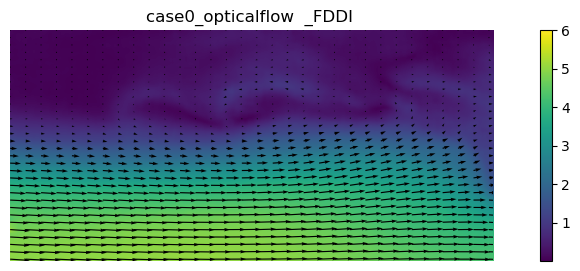

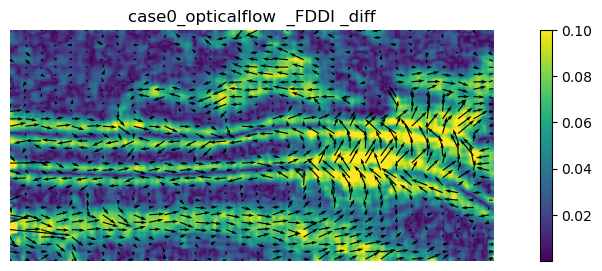

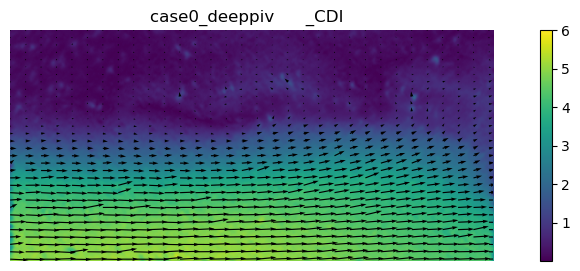

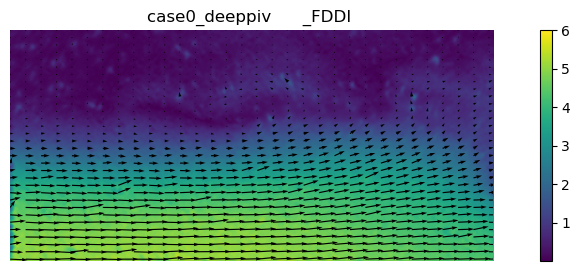

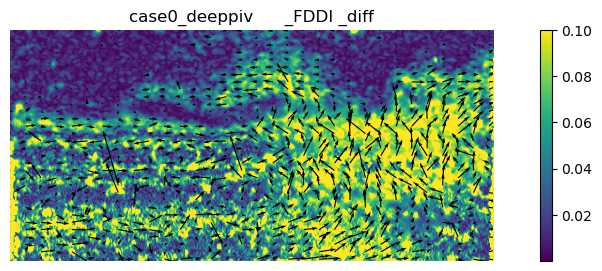

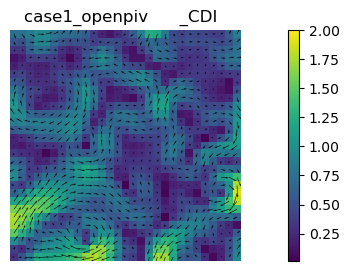

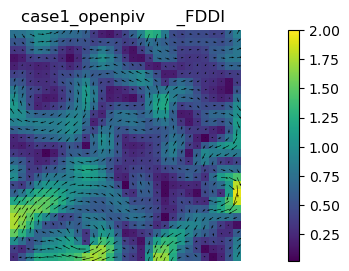

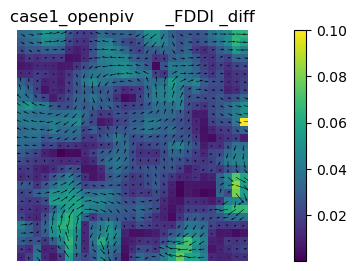

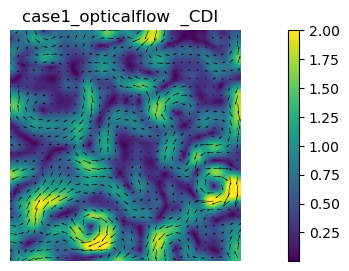

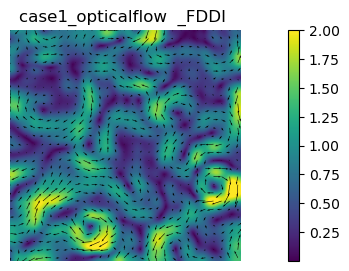

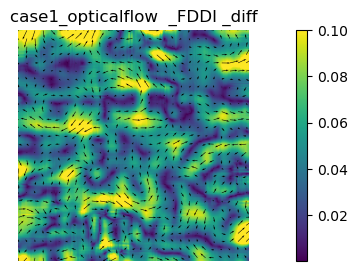

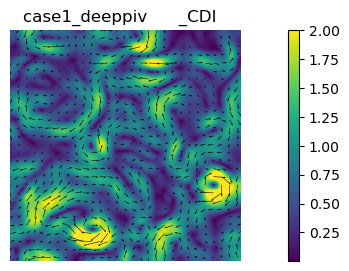

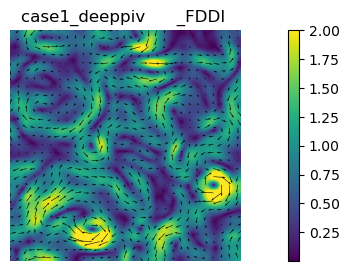

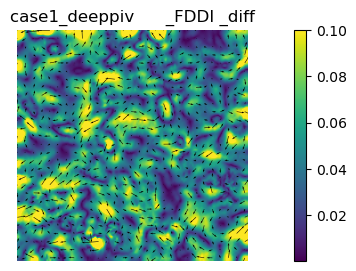

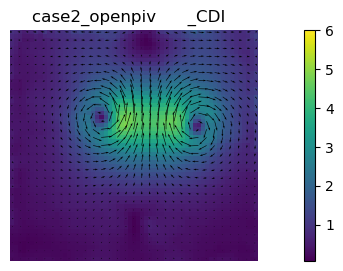

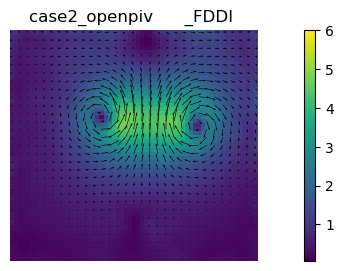

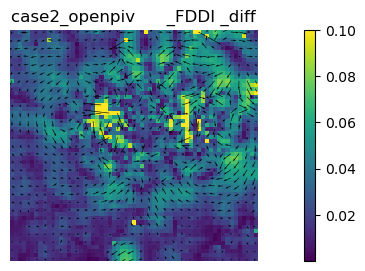

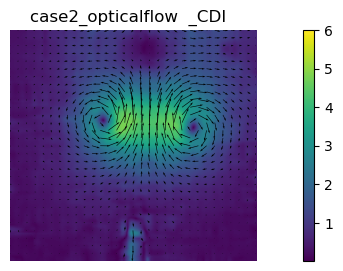

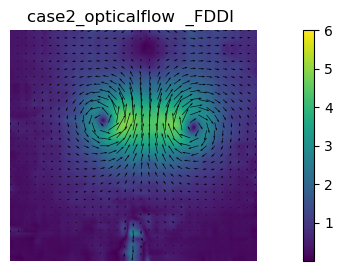

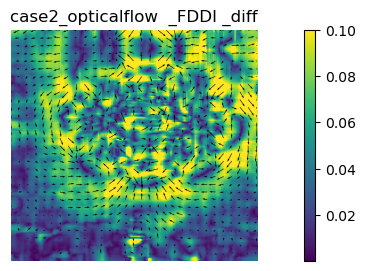

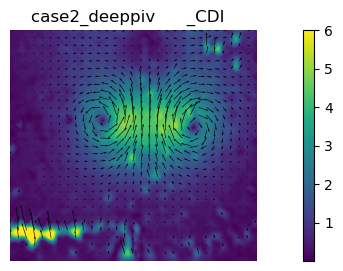

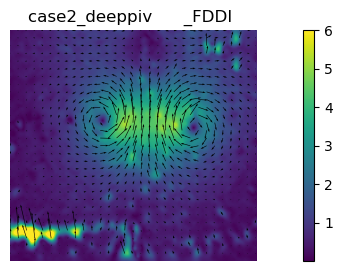

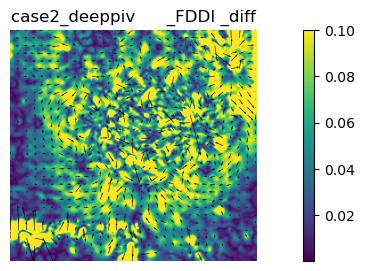

In [2]:
def plot_field(x, y, u, v, vmax):
    x_delta, y_delta = x[0,1]-x[0,0], y[1,0]-x[0,0]
    step0, step1 = int(u.shape[0]/32+1), int(u.shape[1]/32+1)
    
    fig = plt.figure(figsize=(12,3))
    # amplitude
    plt.imshow(np.sqrt(u**2+v**2), vmax=vmax)
    cb = plt.colorbar()
    # vector field
    plt.quiver((x[::step0, ::step1]-x[0,0])/x_delta, (y[::step0, ::step1]-y[0,0])/y_delta, 
               u[::step0, ::step1], -v[::step0, ::step1])
    plt.axis('off')

    
for k, case in enumerate(test_set):
    result = results[k]
    vmax = vmaxs[k]
    # plot the results
    for i, kernel in enumerate(kernel_methods):
        for j, warp in enumerate(warping_methods):
            info =f"case{k}_{kernel:13s}_{warp:5s}"
#             print(info)

            x, y, u, v = result[i][j]
            
            plot_field(x, y, u, v, vmax)
            plt.savefig(f"./output/{k}"+info+'.pdf')
            plt.title(info)

            if warp == 'CDI':
                pass
            else:
                _, _, u_cdi, v_cdi = result[i][0]
                u_diff, v_diff = u-u_cdi, v-v_cdi
                plot_field(x, y, u_diff, v_diff, 0.1)
                plt.savefig(f"./output/{k}"+info+'_diff.pdf')
                plt.title(info+'_diff')
                
                diff_amp = np.sqrt(u_diff**2+v_diff**2)
                # don't evaluate the diff within the image boundary
                diff_amp[:3,:], diff_amp[-3:,:], diff_amp[:,:3], diff_amp[:,-3:] = np.nan, np.nan, np.nan, np.nan
                if diff_amp.shape[0]>100:
                    diff_amp[0:30,:], diff_amp[-30:,:], diff_amp[:,:30], diff_amp[:,-30:] = np.nan, np.nan, np.nan, np.nan
                
                mean_amp = np.nanmean(diff_amp)
                print(info+f"{mean_amp:.3f}")

plt.show()